### The change of potential vorticity in frontal zone LES with various surface wind forcing

In [1]:
# interactive figure
# %matplotlib widget
%matplotlib inline

In [2]:
# auto reload modules
%load_ext autoreload
%autoreload 2

import warnings
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import matplotlib.ticker as tkr
import matplotlib.gridspec as gridspec
from sys import platform
from xgcm import Grid
from IPython.display import HTML, display
from matplotlib.colors import LinearSegmentedColormap
from viztool import FormatScalarFormatter
from spectrum import Gaussian_filter_2d

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [3]:
if platform == 'linux' or platform == 'linux2':
    data_root = '/glade/work/zhihuaz/Data/FrontalZone/'
elif platform == 'darwin':
    data_root = '/Users/zhihua/Documents/Work/Research/Projects/TRACE-SEAS/FrontalZone/Data/'
else:
    print('OS not supported.')

In [56]:
case = 'f11_Q000_W000_D000_St0'

ds = xr.open_dataset(data_root+case+'_full.nc').chunk({'time': 4})
ds.close()

doa = xr.open_dataset(data_root+case+'_PVbulk.nc', group='original').load()
doa.close()

dfa = xr.open_dataset(data_root+case+'_PVbulk.nc', group='filtered').load()
dfa.close()

dfs = xr.open_dataset(data_root+case+'_PVflux.nc').load()
dfs.close()

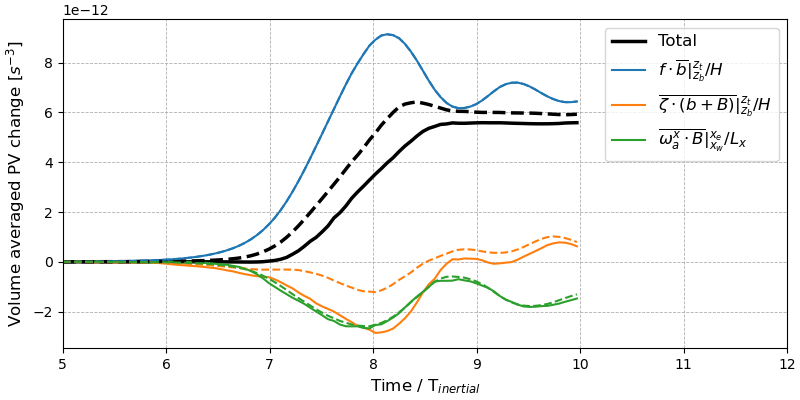

In [14]:
plt.close()
plt.figure(figsize=(8,4), constrained_layout=True)

plt.plot(doa.timeTf, doa.PVvm-doa.PVvm[0], 'k', lw=2.5)
plt.plot(doa.timeTf, doa.PVvm_f-doa.PVvm_f[0])
plt.plot(doa.timeTf, doa.PVvm_z-doa.PVvm_z[0])
plt.plot(doa.timeTf, doa.PVvm_x-doa.PVvm_x[0])

plt.gca().set_prop_cycle(None)
plt.plot(doa.timeTf, dfa.PVvm-dfa.PVvm[0], '--k', lw=2.5)
plt.plot(doa.timeTf, dfa.PVvm_f-dfa.PVvm_f[0], '--')
plt.plot(doa.timeTf, dfa.PVvm_z-dfa.PVvm_z[0], '--')
plt.plot(doa.timeTf, dfa.PVvm_x-dfa.PVvm_x[0], '--')

plt.grid('on', ls='--', lw=0.6)
plt.xlim(5,12)
plt.legend(['Total', r'$f \cdot \overline{b} |^{z_t}_{z_b}/H$', 
            r'$\overline{\zeta \cdot (b+B)} |^{z_t}_{z_b}/H$', 
            r'$\overline{\omega_a^{x} \cdot B} |^{x_e}_{x_w}/L_x$'], fontsize=12)

plt.xlabel(r'Time / T$_{inertial}$', fontsize=12);
plt.ylabel(r'Volume averaged PV change [$s^{-3}$]', fontsize=12);
plt.savefig('../Figures/f11_Q000_W000_D000_St0_PVvm_3comps_filtered.png', dpi=200)

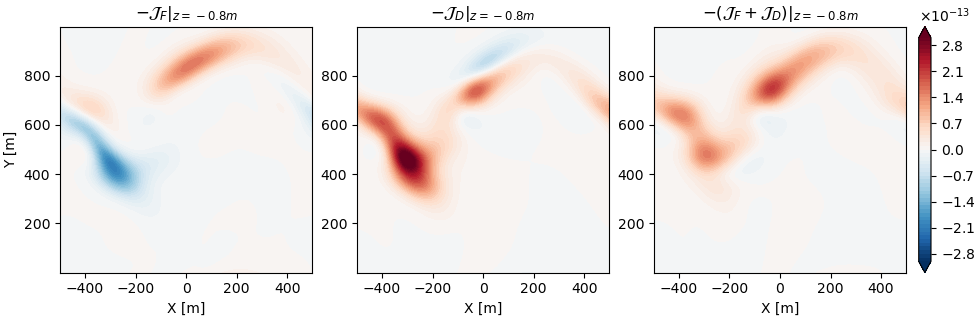

In [37]:
plt.close()
fig = plt.figure(figsize=(9.8,3.2), constrained_layout=True)
kw = {
    'norm': mcolors.CenteredNorm(),
    'levels': np.linspace(-3e-13, 3e-13, 61),
    'cmap': 'RdBu_r',
    'extend': 'both'
}
idx = np.abs(doa.timeTf-8).argmin('time')

ax1 = fig.add_subplot(131)
ax1.contourf(dfs.xC, dfs.yC, -dfs.JzF.isel(time=idx), **kw)
ax1.set_title(r'$-\mathcal{J}_F|_{z=-0.8 m}$')

ax2 = fig.add_subplot(132)
Cu = ax2.contourf(dfs.xC, dfs.yC, -dfs.JzD.isel(time=idx), **kw)
ax2.set_title(r'$-\mathcal{J}_D|_{z=-0.8 m}$')

ax3 = fig.add_subplot(133)
ax3.contourf(dfs.xC, dfs.yC, -dfs.JzF.isel(time=idx)-dfs.JzD.isel(time=idx), **kw)
ax3.set_title(r'$-(\mathcal{J}_F + \mathcal{J}_D)|_{z=-0.8 m}$')

cbar = fig.colorbar(Cu, ax=ax3, fraction=0.5, pad=0.05, format=FormatScalarFormatter('%.1f'))
# cbar.set_label(r'u [m s$^{-1}$]', labelpad=-55)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
cbar.ax.yaxis.set_offset_position('left')

ax1.set_xlabel('X [m]')
ax2.set_xlabel('X [m]')
ax3.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')

plt.savefig('../Figures/f11_Q000_W000_D000_St0_PVflux.png', dpi=200);

In [57]:
periodic_coords = { dim : dict(left=f'{dim}F', center=f'{dim}C') for dim in 'xyz' }
bounded_coords = { dim : dict(outer=f'{dim}F', center=f'{dim}C') for dim in 'xyz' }
coords = { dim : periodic_coords[dim] if tpl=='P' else bounded_coords[dim] for dim, tpl in zip('xyz', 'PPN') }
grid = Grid(ds, coords=coords, periodic=['x','y'])
dx = ds.xF.diff('xF').data[0]
dy = ds.yF.diff('yF').data[0]
dz = grid.diff(ds.zF, axis='z')

/glade/work/zhihuaz/conda-envs/trace-seas/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


/glade/work/zhihuaz/conda-envs/trace-seas/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/glade/work/zhihuaz/conda-envs/trace-seas/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


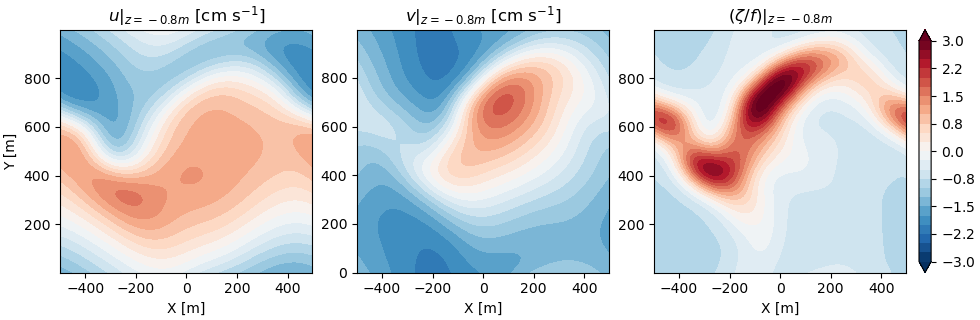

In [73]:
plt.close()
fig = plt.figure(figsize=(9.8,3.2), constrained_layout=True)
kw = {
    'norm': mcolors.CenteredNorm(),
    'levels': np.linspace(-3, 3, 25),
    'cmap': 'RdBu_r',
    'extend': 'both'
}

uf = Gaussian_filter_2d(ds.u.interp(zF=ds.zC[-1]).isel(time=idx), 60, 'xy')
vf = Gaussian_filter_2d(ds.v.interp(zF=ds.zC[-1]).isel(time=idx), 60, 'xy')
zetaf = grid.diff(vf, axis='x')/dx - grid.diff(uf, axis='y')/dy

ax1 = fig.add_subplot(131)
ax1.contourf(ds.xF, ds.yC, uf*100, **kw)
ax1.set_title(r'$u|_{z=-0.8 m}$ [cm s$^{-1}$]')

ax2 = fig.add_subplot(132)
Cu = ax2.contourf(ds.xC, ds.yF, vf*100, **kw)
ax2.set_title(r'$v|_{z=-0.8 m}$ [cm s$^{-1}$]')

ax3 = fig.add_subplot(133)
ax3.contourf(ds.xC, ds.yC, zetaf/ds.f, **kw)
ax3.set_title(r'$(\zeta/f)|_{z=-0.8 m}$')

cbar = fig.colorbar(Cu, ax=ax3, fraction=0.5, pad=0.05, format=FormatScalarFormatter('%.1f'))
# cbar.set_label(r'u [m s$^{-1}$]', labelpad=-55)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
cbar.ax.yaxis.set_offset_position('left')

ax1.set_xlabel('X [m]')
ax2.set_xlabel('X [m]')
ax3.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]');

plt.savefig('../Figures/f11_Q000_W000_D000_St0_uvzeta_filtered.png', dpi=200);

In [ ]:
H = (ds.zC[-1] - ds.zC[0])

Jflux_int = -(dfs.JzF+dfs.JzD).sum(['xC','yC']).cumsum('time')*(1e3/512)**2*3600

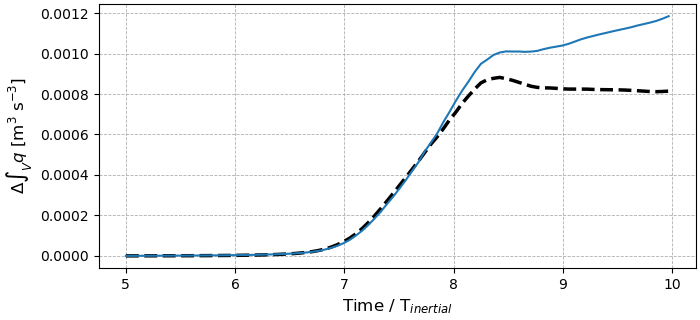

In [100]:
plt.close()
plt.figure(figsize=(7,3.2), constrained_layout=True)

plt.plot(doa.timeTf, (dfa.PVvm-dfa.PVvm[0])*1e6*H, '--k', lw=2.5);
plt.plot(doa.timeTf, Jflux_int-Jflux_int[0])
plt.grid('on', ls='--', lw=0.6)
plt.ylabel(r'$\Delta \int_V q$ [m$^3$ s$^{-3}$]', fontsize=12);
plt.xlabel(r'Time / T$_{inertial}$', fontsize=12);